In [44]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy
import re
from mpl_toolkits.mplot3d import Axes3D



In [45]:
##### folder name
uni = "direction_e_1_128_8_128_5_20250116"  

##### load prediction result
path = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]
df = pd.read_csv(pred_list[0])


##### load energy label
path_name = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/name_"+uni +".csv"
pred_path_name = glob.glob(path_name)
pred_list_name = [file for file in pred_path_name if file.endswith(".csv")]
df2 = pd.read_csv(pred_list_name[0])

In [46]:
pred = np.array(df['prediction']).reshape(-1,3)
label = np.array(df['label']).reshape(-1,3)
fname = np.array(df2['fname']).reshape(-1,1)


In [47]:
#### extract energy label
pattern = re.compile(r'(\d+)MeV')
fnames = []
for row in fname:
    name = row[0] if isinstance(row, (list, np.ndarray)) else row
    match = pattern.search(name)
    if match:
        fnames.append(match.group(1))  
fnames = np.array(fnames, dtype=int)


In [48]:
# 각 벡터 쌍에 대해 내적 계산
dot_products = np.einsum('ij,ij->i', label, pred)

# 벡터의 크기 계산
norm_a = np.linalg.norm(label, axis=1)
norm_b = np.linalg.norm(pred, axis=1)

# 코사인 값을 통해 각도 계산 (라디안 단위)
cos_theta = dot_products / (norm_a * norm_b)
theta = np.arccos(cos_theta)

# 각도를 도 단위로 변환
theta_degrees = np.degrees(theta)

print(f"각 벡터 쌍 사이의 각도 (라디안): {theta}")
print(f"각 벡터 쌍 사이의 각도 (도): {theta_degrees}")


각 벡터 쌍 사이의 각도 (라디안): [0.03491267 0.02857712 0.09293107 ... 0.21420926 0.02114593 0.02644742]
각 벡터 쌍 사이의 각도 (도): [ 2.00034853  1.63734833  5.32455785 ... 12.27328659  1.21157267
  1.51532563]


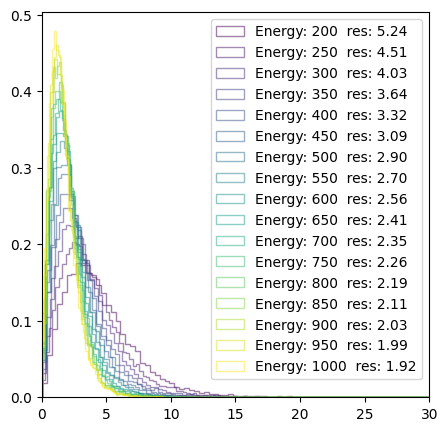

In [49]:
colors = plt.cm.viridis(np.linspace(0, 1, len(range(200, 1050, 50))))
energys = []
resolution = []
for idx, energy in enumerate(range(200, 1050, 50)):
    energys.append(energy)
    resolution.append(np.sort(theta_degrees[fnames==energy])[int(theta_degrees[fnames==energy].shape[0]*(0.68))])
    plt.hist(theta_degrees[fnames==energy], bins=400, color=colors[idx], alpha=0.5, density=True, histtype='step', label=f'Energy: {energy}' + '  res: ' +f'{np.sort(theta_degrees[fnames==energy])[int(theta_degrees[fnames==energy].shape[0]*(0.68))]:.2f}')
plt.xlim([0, 30])
plt.legend()

plt.show()

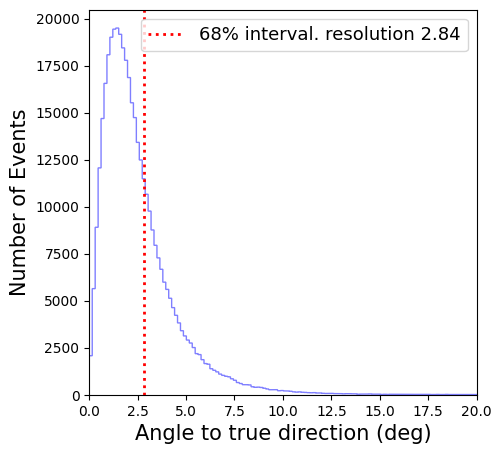

In [50]:

bins = 1000

plt.hist(theta_degrees,bins = bins, color= 'b', alpha = 0.5, density = False, histtype = 'step')


plt.axvline(np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))], color='red', linestyle='dotted', linewidth=2, label=f'68% interval. resolution {np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))]:.2f}')


# plt.title('Histogram of distance from true vertex',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# plt.xlabel("??", fontsize=10, loc='right')
plt.xlim([0,20])
plt.xlabel('Angle to true direction (deg)',fontsize=15)
plt.ylabel('Number of Events',fontsize=15)
plt.legend(fontsize=13)
plt.show()


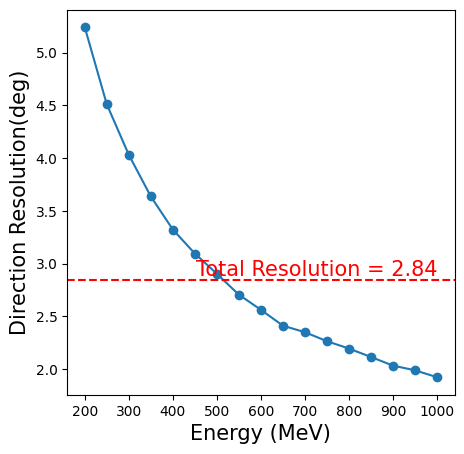

In [51]:
plt.plot(energys, resolution, marker='o', linestyle='-')
# plt.scatter(energys,resolution,'o-r')
plt.xlabel('Energy (MeV)',fontsize=15)
plt.ylabel('Direction Resolution(deg)',fontsize=15)
resolution_value = round(np.sort(theta_degrees)[int(theta_degrees.shape[0] * 0.68)], 2)
plt.axhline(y=np.sort(theta_degrees)[int(theta_degrees.shape[0]*(0.68))], color='red', linestyle='--', label='Total Accuracy = 99.83%')
plt.text(energys[-1], resolution_value + 0.2, f'Total Resolution = {resolution_value}', color='red', va='top', ha='right', fontsize=15)
plt.show()